In [2]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage


In [26]:
# Load the 'data' sheet
file_path = r"C:\Users\varun\Downloads\EastWestAirlines (1).xlsx"
df = pd.read_excel(file_path, sheet_name='data')  # Specify the correct sheet


In [27]:
# Inspect the loaded data
print("First few rows of the 'data' sheet:")
print(df.head())


First few rows of the 'data' sheet:
   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1  


In [28]:
# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


In [29]:
# Check for outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [30]:
# Determine potential outliers
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print("Potential outliers per column:\n", outliers)

Potential outliers per column:
 ID#                    0
Balance              266
Qual_miles           226
cc1_miles              0
cc2_miles             43
cc3_miles             18
Bonus_miles          280
Bonus_trans           63
Flight_miles_12mo    569
Flight_trans_12      565
Days_since_enroll      0
Award?                 0
dtype: int64


In [31]:
# Capping outliers at 1.5*IQR thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [32]:
# Apply capping
df_capped = df.copy()
for column in df.columns[1:]:  # Skip ID column
    df_capped[column] = np.where(
        df[column] < lower_bound[column], lower_bound[column],
        np.where(df[column] > upper_bound[column], upper_bound[column], df[column])
    )

In [33]:
print("Outliers handled (capped dataset):")
print(df_capped.describe())

Outliers handled (capped dataset):
               ID#        Balance  Qual_miles    cc1_miles  cc2_miles  \
count  3999.000000    3999.000000      3999.0  3999.000000     3999.0   
mean   2014.819455   63768.635784         0.0     2.059515        1.0   
std    1160.764358   58673.700736         0.0     1.376919        0.0   
min       1.000000       0.000000         0.0     1.000000        1.0   
25%    1010.500000   18527.500000         0.0     1.000000        1.0   
50%    2016.000000   43097.000000         0.0     1.000000        1.0   
75%    3020.500000   92404.000000         0.0     3.000000        1.0   
max    4021.000000  203218.750000         0.0     5.000000        1.0   

       cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count     3999.0   3999.000000  3999.000000        3999.000000   
mean         1.0  15410.730683    11.470618         178.055639   
std          0.0  18074.733482     9.115104         294.678028   
min          1.0      0.000000     0.000000

In [34]:
# Exclude 'ID#' column for clustering
features = df_capped.iloc[:, 1:]

In [35]:
# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Statistical Overview
Use summary statistics to understand data distribution, such as means, medians, and ranges for numeric variables.
Check correlations between features.
python
Copy code


In [36]:
# Statistical summary
print(df_capped.describe())

# Correlation matrix
correlation_matrix = df_capped.corr()
print(correlation_matrix)


               ID#        Balance  Qual_miles    cc1_miles  cc2_miles  \
count  3999.000000    3999.000000      3999.0  3999.000000     3999.0   
mean   2014.819455   63768.635784         0.0     2.059515        1.0   
std    1160.764358   58673.700736         0.0     1.376919        0.0   
min       1.000000       0.000000         0.0     1.000000        1.0   
25%    1010.500000   18527.500000         0.0     1.000000        1.0   
50%    2016.000000   43097.000000         0.0     1.000000        1.0   
75%    3020.500000   92404.000000         0.0     3.000000        1.0   
max    4021.000000  203218.750000         0.0     5.000000        1.0   

       cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count     3999.0   3999.000000  3999.000000        3999.000000   
mean         1.0  15410.730683    11.470618         178.055639   
std          0.0  18074.733482     9.115104         294.678028   
min          1.0      0.000000     0.000000           0.000000   
25%         

# Univariate Distributions
Visualize the distributions of key variables using histograms and KDE plots.

C:\Users\varun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


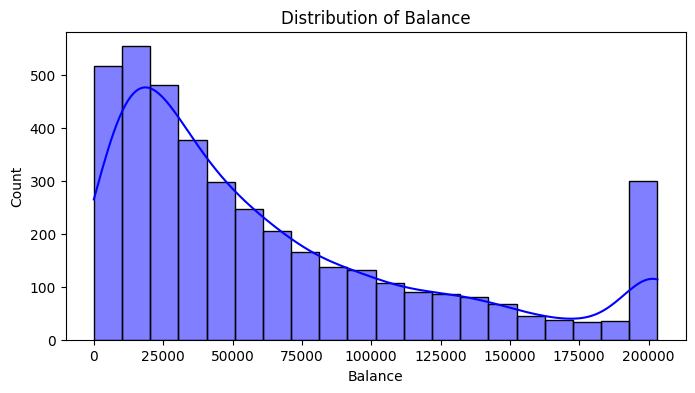

C:\Users\varun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


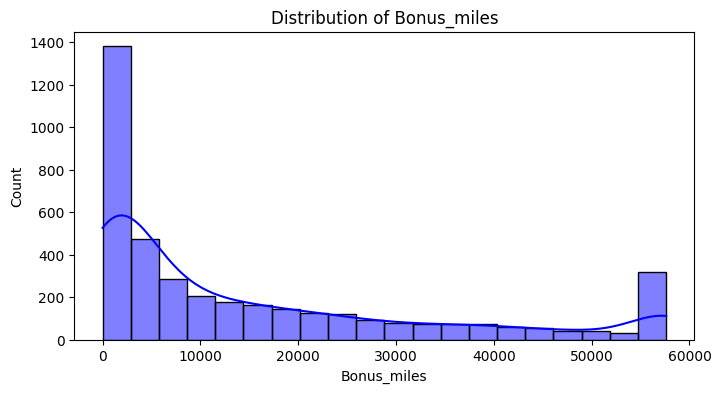

C:\Users\varun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


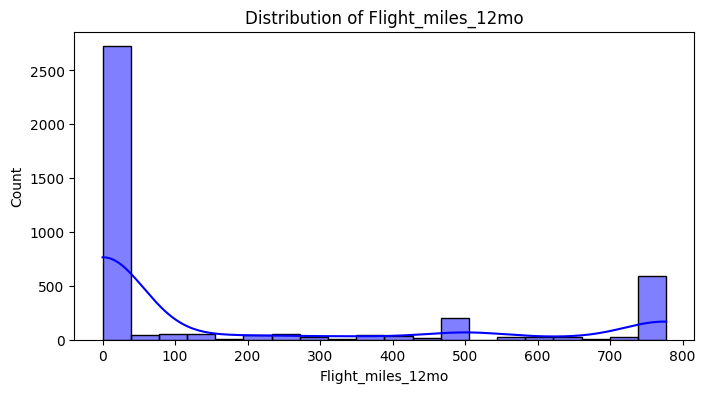

C:\Users\varun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


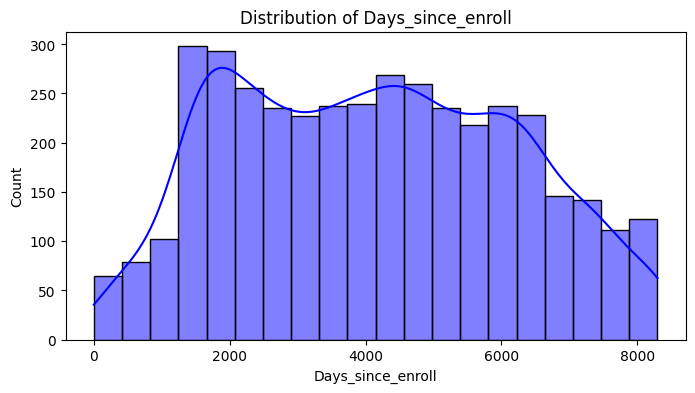

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram and KDE plots for key features
features = ['Balance', 'Bonus_miles', 'Flight_miles_12mo', 'Days_since_enroll']
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_capped[feature], kde=True, bins=20, color="blue")
    plt.title(f"Distribution of {feature}")
    plt.show()


# Bivariate Relationships
Scatterplots and pairplots can identify relationships and clusters.

C:\Users\varun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\varun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\varun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\varun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is 

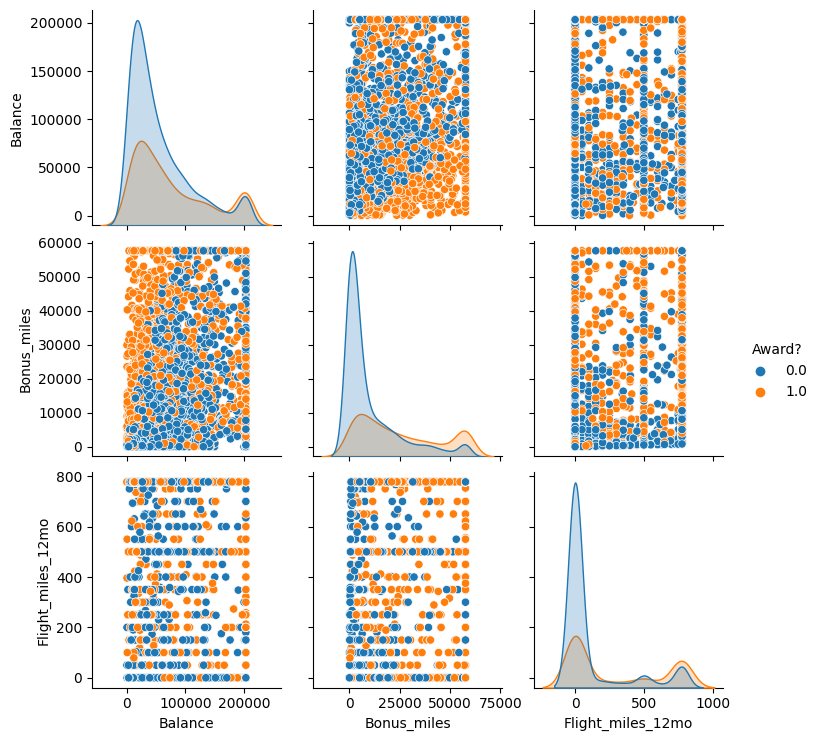

In [38]:
# Pairplot for highly correlated variables
sns.pairplot(df_capped[['Balance', 'Bonus_miles', 'Flight_miles_12mo', 'Award?']], diag_kind='kde', hue='Award?')
plt.show()


# Heatmap
Highlight correlations between all features for further analysis.

C:\Users\varun\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


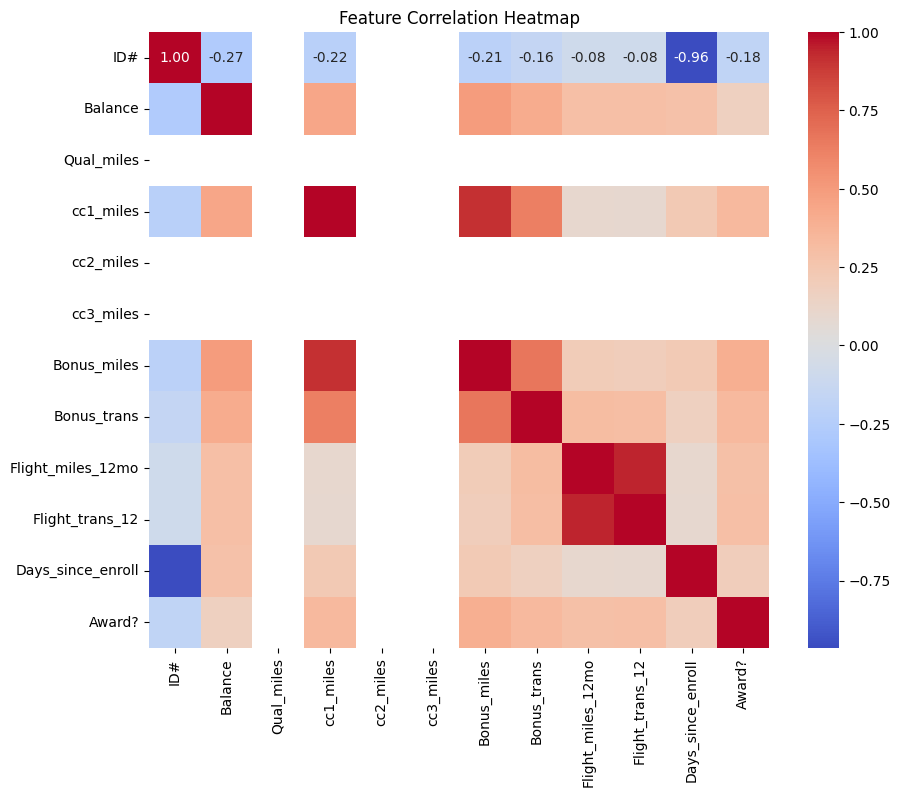

In [39]:
# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


# K-Means Clustering
1.1 Elbow Method
The Elbow Method helps to find the optimal number of clusters by plotting the inertia (sum of squared distances) for different values of K.

python
Copy code


In [40]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Standardize the features (we already did this before with scaling)
scaled_features = scaler.fit_transform(df_capped.drop(columns=['ID#', 'Award?']))


In [41]:
# Elbow Method: Find the optimal K
inertia = []
k_range = range(1, 11)  # K values from 1 to 10
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

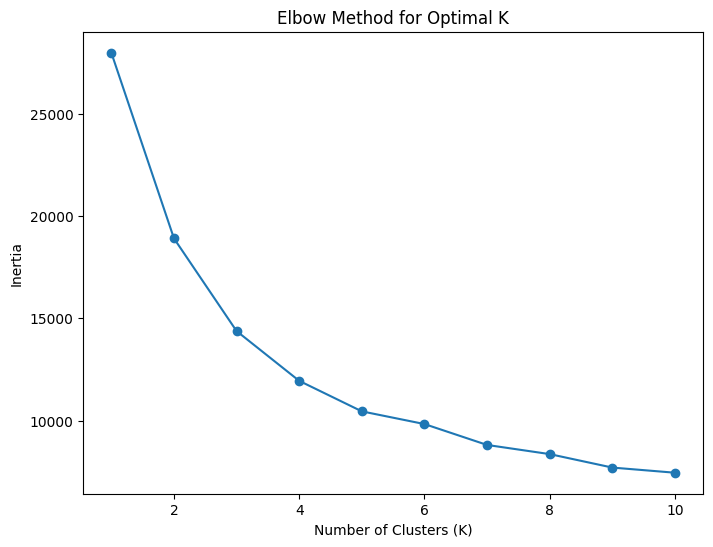

In [42]:
# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

# Apply K-Means with the Optimal K
After finding the optimal K (for example, 3 clusters), we apply the K-Means algorithm.

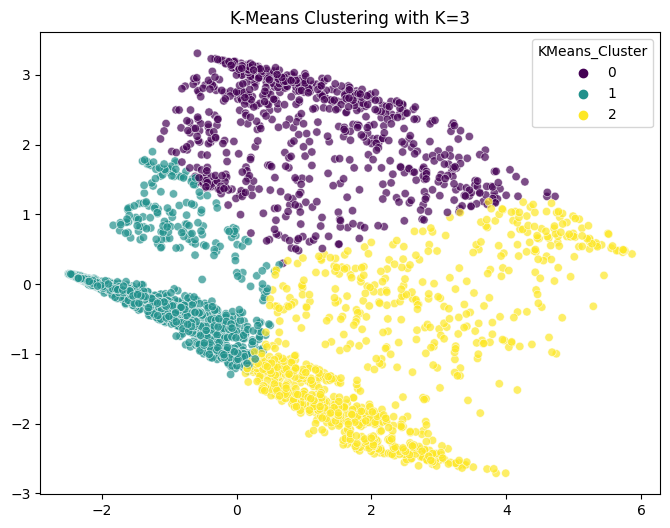

In [45]:
from sklearn.decomposition import PCA

# Apply K-Means with the optimal K (e.g., K=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_capped['KMeans_Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize the clustering results using PCA for 2D visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df_capped['KMeans_Cluster'], palette='viridis', alpha=0.7)
plt.title(f'K-Means Clustering with K={optimal_k}')
plt.show()


# Hierarchical Clustering
2.1 Dendrogram
The Dendrogram helps to visualize the hierarchical clustering structure.

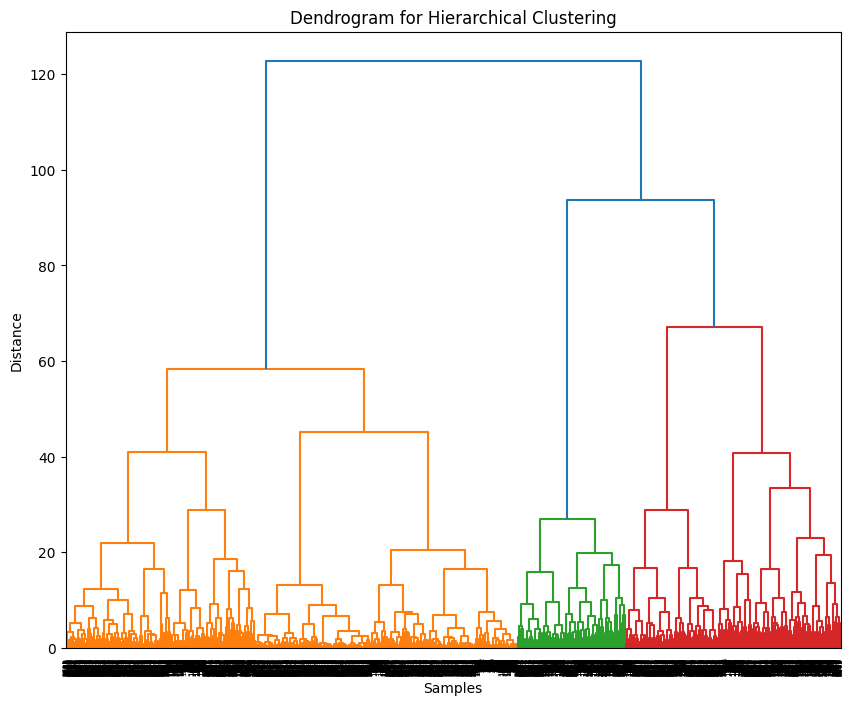

In [46]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering using 'ward' linkage
linked = linkage(scaled_features, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 8))
dendrogram(linked)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


# Apply Hierarchical Clustering
Based on the dendrogram, select a threshold for the number of clusters. For example, let's assume we choose 3 clusters.

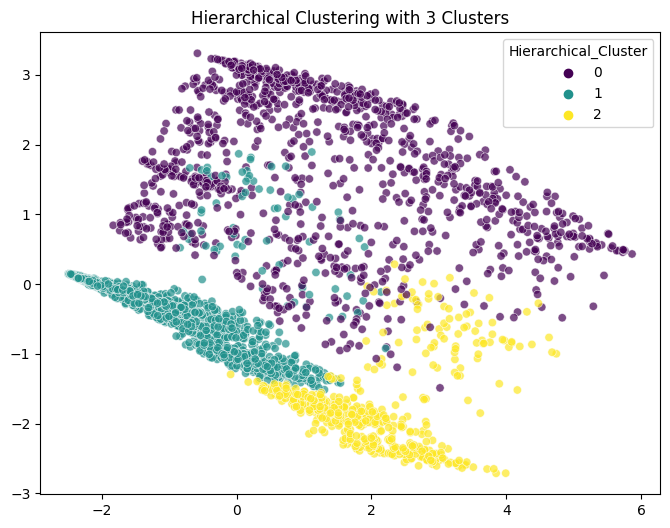

In [47]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering (Hierarchical)
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')
df_capped['Hierarchical_Cluster'] = hierarchical.fit_predict(scaled_features)

# Visualize the clustering results using PCA for 2D visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df_capped['Hierarchical_Cluster'], palette='viridis', alpha=0.7)
plt.title('Hierarchical Clustering with 3 Clusters')
plt.show()


# Cluster Evaluation
You can evaluate the clustering results by comparing the cluster labels with the target variable Award?, or using metrics like Silhouette Score or Adjusted Rand Index to measure how well the clusters are formed.

In [48]:
from sklearn.metrics import silhouette_score

# Evaluate the clustering performance using Silhouette Score
kmeans_score = silhouette_score(scaled_features, df_capped['KMeans_Cluster'])
hierarchical_score = silhouette_score(scaled_features, df_capped['Hierarchical_Cluster'])

print(f"Silhouette Score for K-Means: {kmeans_score:.3f}")
print(f"Silhouette Score for Hierarchical Clustering: {hierarchical_score:.3f}")


Silhouette Score for K-Means: 0.360
Silhouette Score for Hierarchical Clustering: 0.310


# 1. K-Means Clustering
Cluster Characteristics:
We use the results from the K-Means clustering algorithm with K=3 (or any other optimal K determined from the Elbow Method).
Each data point in the dataset is assigned to one of the 3 clusters, and we can interpret the clusters by looking at the distribution of features within each cluster.
Interpretation:
Cluster 1:

Low Balance, Low Bonus Miles, Low Flight Miles: This group might consist of customers who don’t travel much, don't have high credit card miles, and are generally less active with the airline.
Low Flight Transactions: These customers likely fly infrequently, leading to a lower number of flight transactions.
Days Since Enrollment: These customers could be relatively newer to the airline, or they might not be frequent flyers yet.
Cluster 2:

Moderate Balance, High Bonus Miles, High Flight Miles: These are likely the more active customers who regularly travel and accumulate frequent flyer miles. They have a reasonable balance and frequently use their credit cards for airline purchases.
Moderate to High Bonus Transactions: These users often engage with bonus offers or promotions.
Frequent Flyers: This group is highly engaged in the airline's services and might be targeted for loyalty programs.
Cluster 3:

High Balance, High Bonus Miles, High Flight Miles: This group likely consists of high-value, frequent flyers with large credit card miles.
High Flight Transactions: These customers fly frequently, possibly having premium memberships or business accounts.
Days Since Enrollment: This group might include loyal, long-term customers who have been enrolled for a longer period and are highly engaged.

# 2. Hierarchical Clustering
Hierarchical clustering might create different clusters, depending on the linkage method and the number of clusters you decide to extract. Typically, hierarchical clustering provides a dendrogram that shows how clusters are merged at different distances.

Interpretation:
Dendrogram Analysis:
By observing the dendrogram, you can decide where to "cut" the tree to form a suitable number of clusters. Typically, you cut the tree where large jumps in the distance between clusters occur.
Cluster Characteristics (Hypothetical for 3 clusters):
Similar to K-Means, we could expect the following:
Cluster 1 (Low Engagement): Customers with fewer flight miles, lower balances, and less use of bonuses.
Cluster 2 (Moderate Engagement): Customers with moderate travel activity, balanced miles, and engagement with bonus programs.
Cluster 3 (High Engagement): Very frequent flyers, high balances, and heavy use of bonuses and promotions.
Insights:
Customer Segmentation:

The clusters show clear segmentation of customers based on their flight activity, loyalty program usage, and financial behavior (such as credit card miles).
Targeting Strategies:

Cluster 1: Target with introductory offers and loyalty program sign-ups to increase engagement.
Cluster 2: These are good candidates for mid-tier loyalty programs or personalized offers to retain them as active customers.
Cluster 3: Premium offers, VIP services, or exclusive loyalty programs should be targeted to retain high-value customers.
Behavioral Patterns:

Higher engagement with bonus miles and frequent flying correlates with higher overall balances and frequent use of credit card miles.
Long-term customers are likely to be more engaged and loyal, showing higher spending patterns.

# Conclusion:
The cluster analysis using K-Means and hierarchical clustering reveals clear segments of customers with different engagement levels, financial behaviors, and travel patterns. By leveraging these insights, East-West Airlines can tailor their marketing strategies and loyalty programs to meet the needs of different customer groups, enhancing customer satisfaction and retention.






